In [1]:
from pathlib import Path

SRC_DIR = Path("..") / "src"
if SRC_DIR.exists():
    import sys
    sys.path.append(str(SRC_DIR))

In [2]:
from utils import load_raw
from processor import EEGProcessingConfig, EEGProcessor

import matplotlib.pyplot as plt

In [3]:
# Configurations
FILENAME = "curry2"
INPUT_PATH = Path(f"../data/interim/{FILENAME}_raw.fif")

PROCESSING_CONFIG = EEGProcessingConfig(
    high_pass=0.5,
    low_pass=80.0,
    notch_freqs=[60.0, 120.0],
    reference="average"
)

In [4]:
# Load Raw EEG file
raw = load_raw(INPUT_PATH)

In [5]:
# Metadata summary
n_channels = raw.info['nchan']
sfreq = raw.info['sfreq']
ch_names = raw.info['ch_names']

print(f"Number of channels: {n_channels}")
print(f"Sampling frequency: {sfreq} Hz")
print(f"Channel names: {ch_names}")

Number of channels: 18
Sampling frequency: 256.0 Hz
Channel names: ['C3', 'C4', 'O1', 'O2', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']


In [6]:
# Preprocess EEG data
processor = EEGProcessor(PROCESSING_CONFIG)
raw_processed = processor.process(raw)

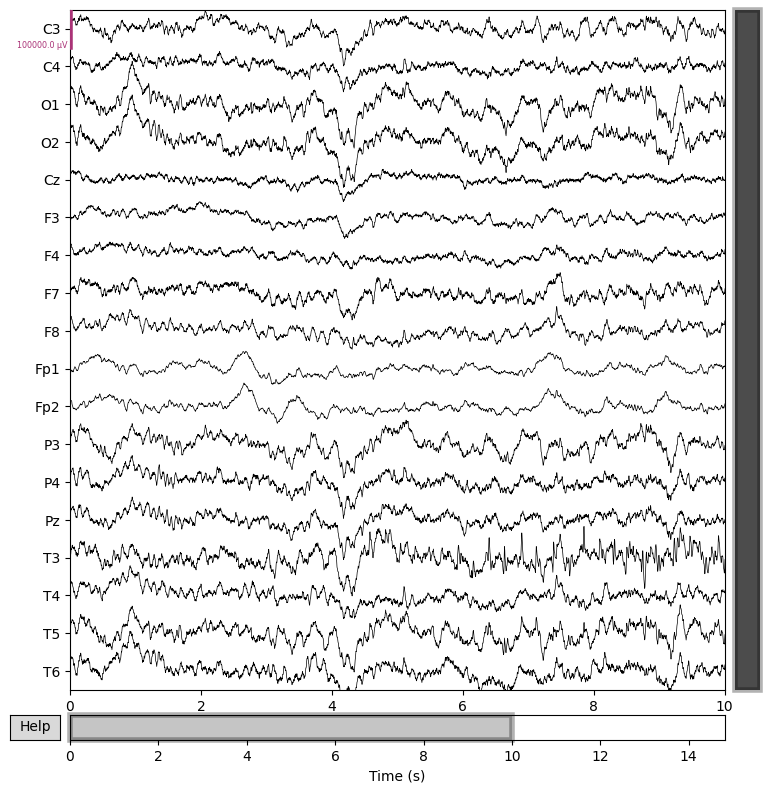

In [7]:
# Visualization of continous recording before preprocessing
raw.plot(n_channels=n_channels, duration=10.0, show=False, scalings=0.05);


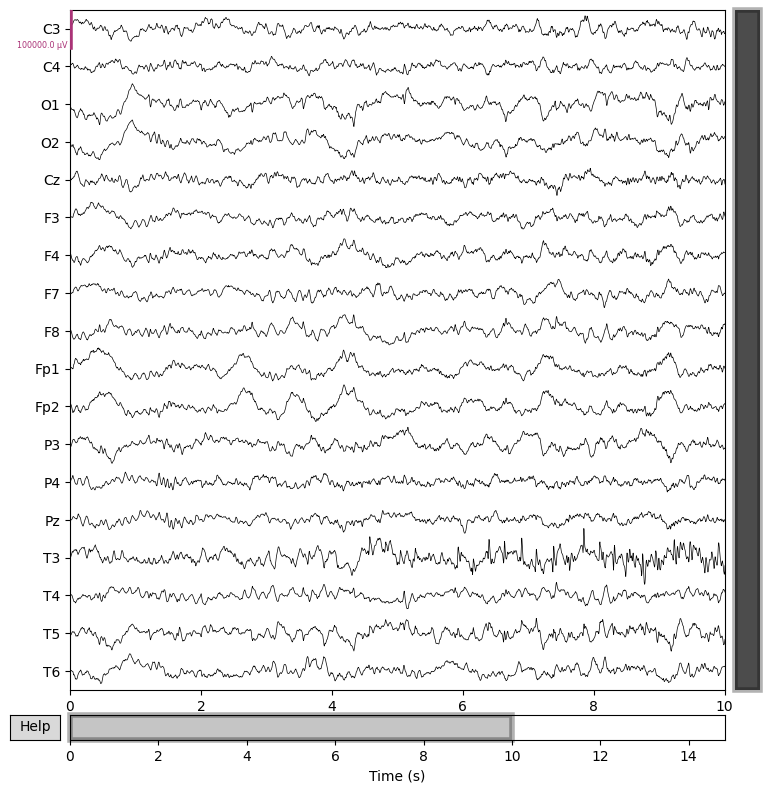

In [8]:
# Visualization of continous recording after preprocessing
raw_processed.plot(n_channels=n_channels, duration=10.0, show=False, scalings=0.05)